#Exploratory Data Analysis on a Dataset


In [ ]:
#loas the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [ ]:
data=pd.read_csv("/content/Cardiotocographic.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


##1.Data Cleaning and Preparation:


In [ ]:
data.head() #load the datasets into data structure


LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0

In [ ]:
data.isnull().sum() #handle missing values

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.dtypes #Correct data types

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [ ]:
data = data.apply(pd.to_numeric, errors='coerce')

In [ ]:
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
data = data[(z_scores < 3).all(axis=1)] #Detect and treat outliers (Z-score or IQR)

##2.Statistical Summary

In [ ]:
data.describe()

LB           AC           FM           UC           DL  \
count  1852.000000  1852.000000  1852.000000  1852.000000  1852.000000   
mean    133.324660     0.003190     0.004247     0.004385     0.001726   
std       9.960415     0.003786     0.013604     0.002910     0.002703   
min     106.000000    -0.000185    -0.005106    -0.000132    -0.000124   
25%     126.000000     0.000000     0.000000     0.001965     0.000000   
50%     133.000000     0.001699     0.000000     0.004549     0.000000   
75%     141.000000     0.005725     0.002342     0.006591     0.003035   
max     160.000000     0.016000     0.189320     0.013861     0.011837   

                 DS           DP         ASTV         MSTV         ALTV  \
count  1.852000e+03  1852.000000  1852.000000  1852.000000  1852.000000   
mean   1.197071e-08     0.000101    46.873502     1.280993     9.318784   
std    5.880829e-07     0.000406    16.858457     0.778693    16.752145   
min   -6.650000e-06    -0.000045    11.799846     0.200000    -1.043619   
25%    0.000000e+00     0.000000    32.000000     0.700000     0.000000   
50%    0.000000e+00     0.000000    48.000000     1.165236     0.000000   
75%    0.000000e+00     0.000000    61.000000     1.700000    11.000000   
max    6.323448e-06     0.002674    87.000000     4.800000    74.000000   

              MLTV        Width     Tendency          NSP  
count  1852.000000  1852.000000  1852.000000  1852.000000  
mean      8.326914    68.871576     0.333149     1.246242  
std       5.251192    37.811605     0.603979     0.534136  
min      -0.200788     7.000000    -1.006614     0.967075  
25%       4.900000    37.000000     0.000000     1.000000  
50%       7.600000    65.000000     0.000000     1.000000  
75%      11.000000    98.000000     1.000000     1.000000  
max      29.500000   180.000000     1.023635     3.034545

In [ ]:
data.median()
data.quantile([0.25,0.75])

LB        AC        FM        UC        DL   DS   DP  ASTV  MSTV  \
0.25  126.0  0.000000  0.000000  0.001965  0.000000  0.0  0.0  32.0   0.7   
0.75  141.0  0.005725  0.002342  0.006591  0.003035  0.0  0.0  61.0   1.7   

      ALTV  MLTV  Width  Tendency  NSP  
0.25   0.0   4.9   37.0       0.0  1.0  
0.75  11.0  11.0   98.0       1.0  1.0

 high variability or skewed distributions in columns like ASTV, ALTV, DL, or any others.

##3.Data Visualization

<Axes: >

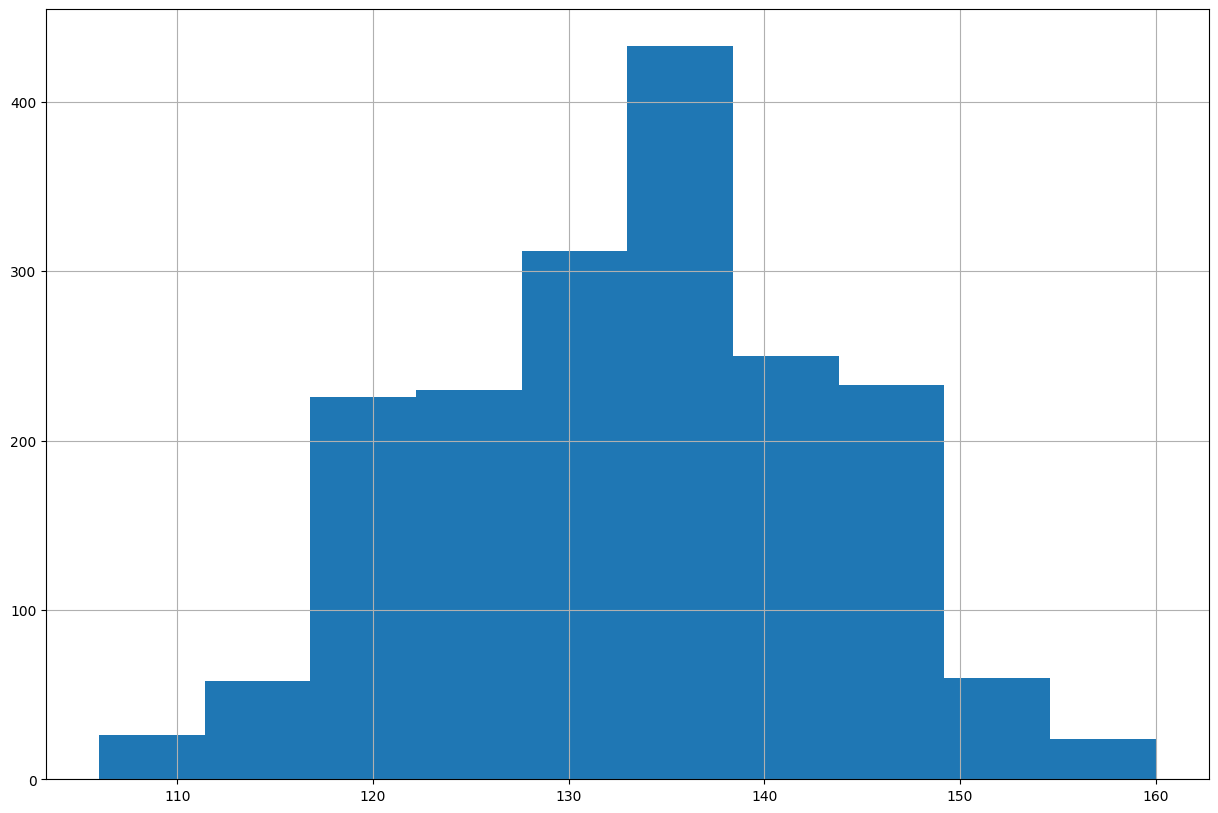

In [ ]:
data['LB'].hist(figsize=(15,10)) #Histogram

<Axes: >

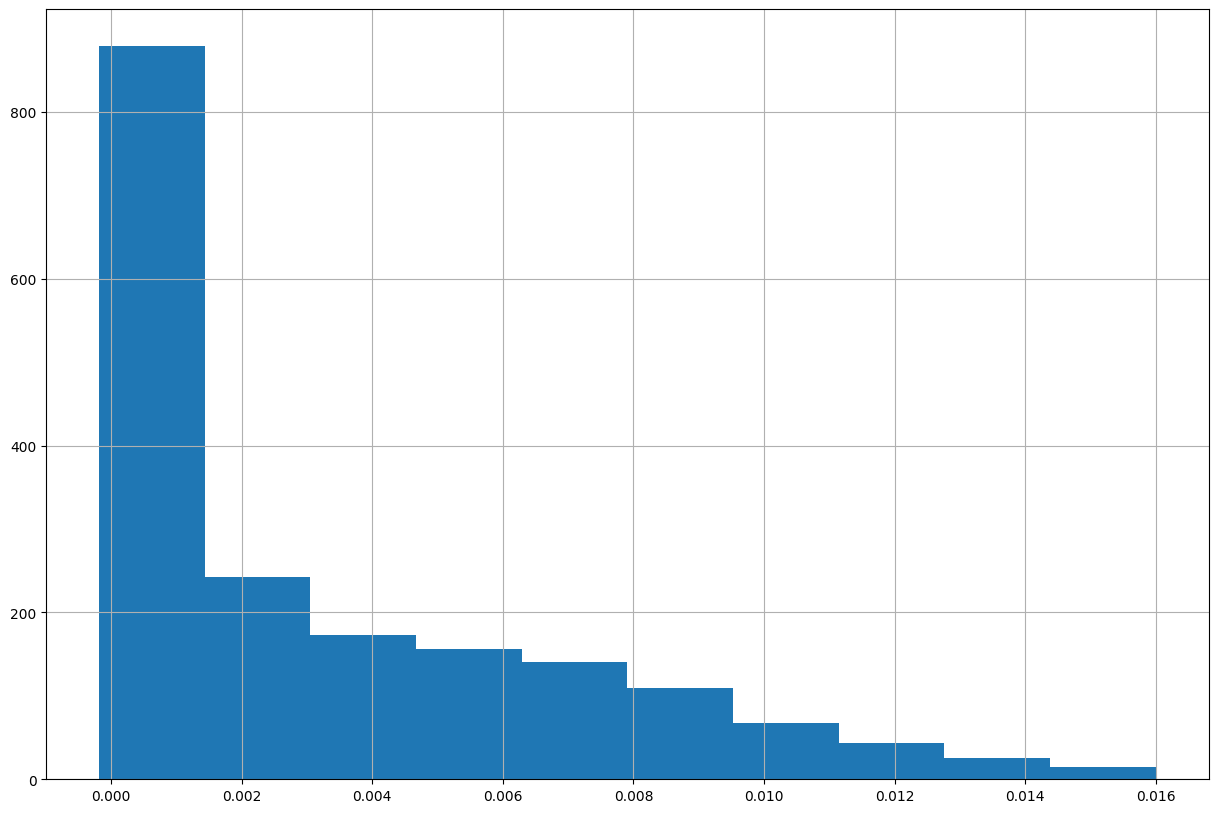

In [ ]:
data['AC'].hist(figsize=(15,10))

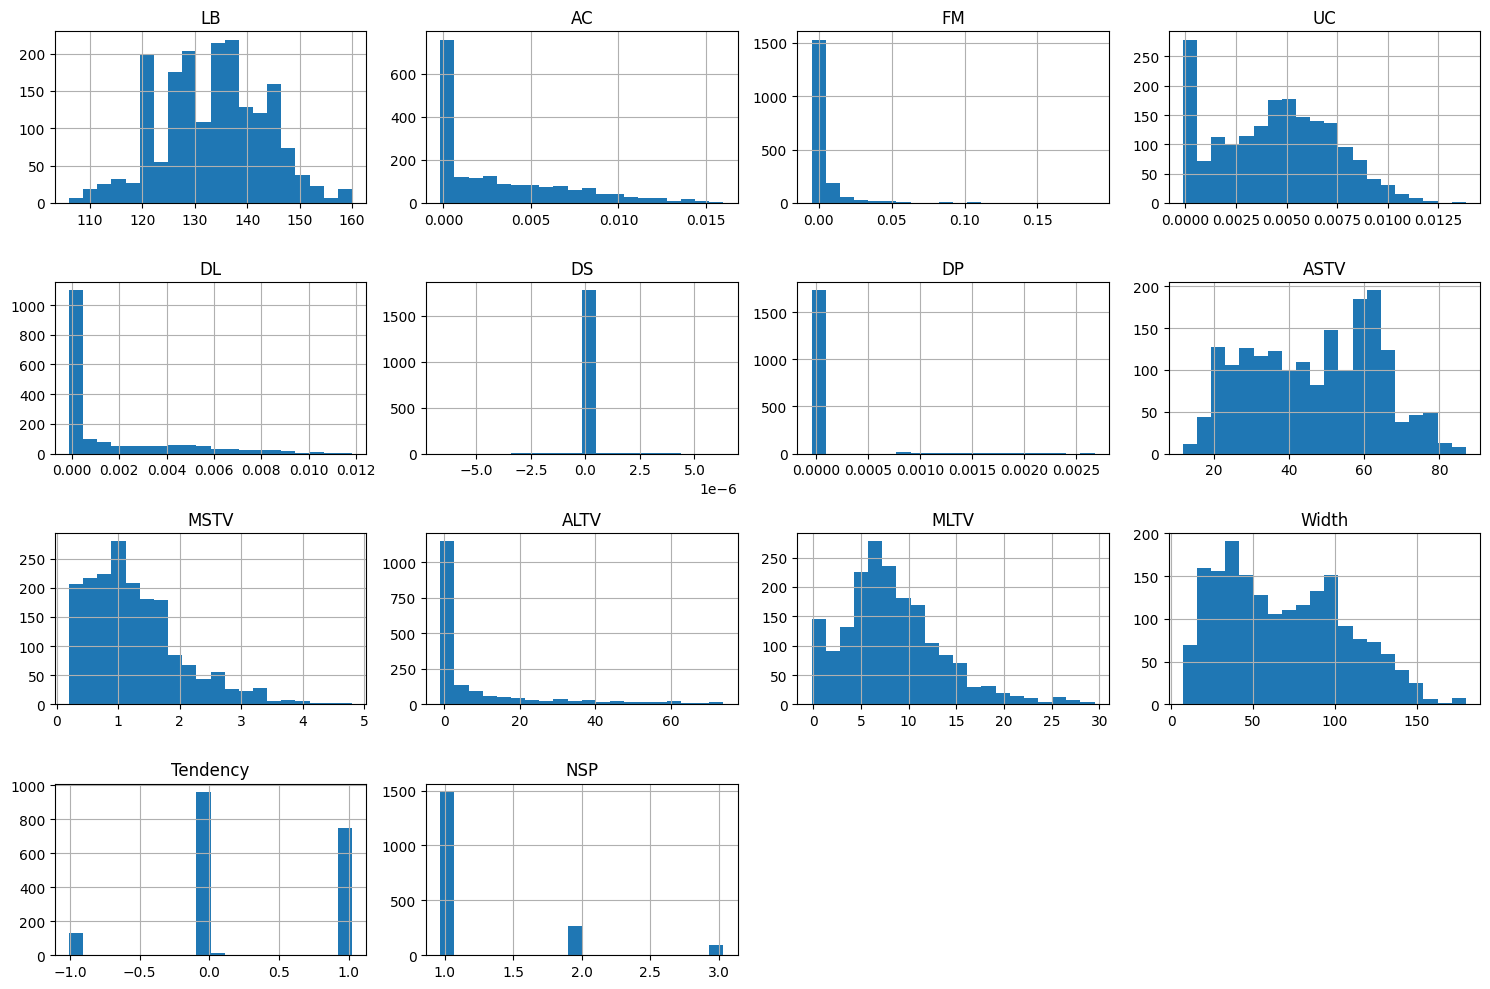

In [ ]:
data.hist(bins=20, figsize=(15, 10))
plt.tight_layout()

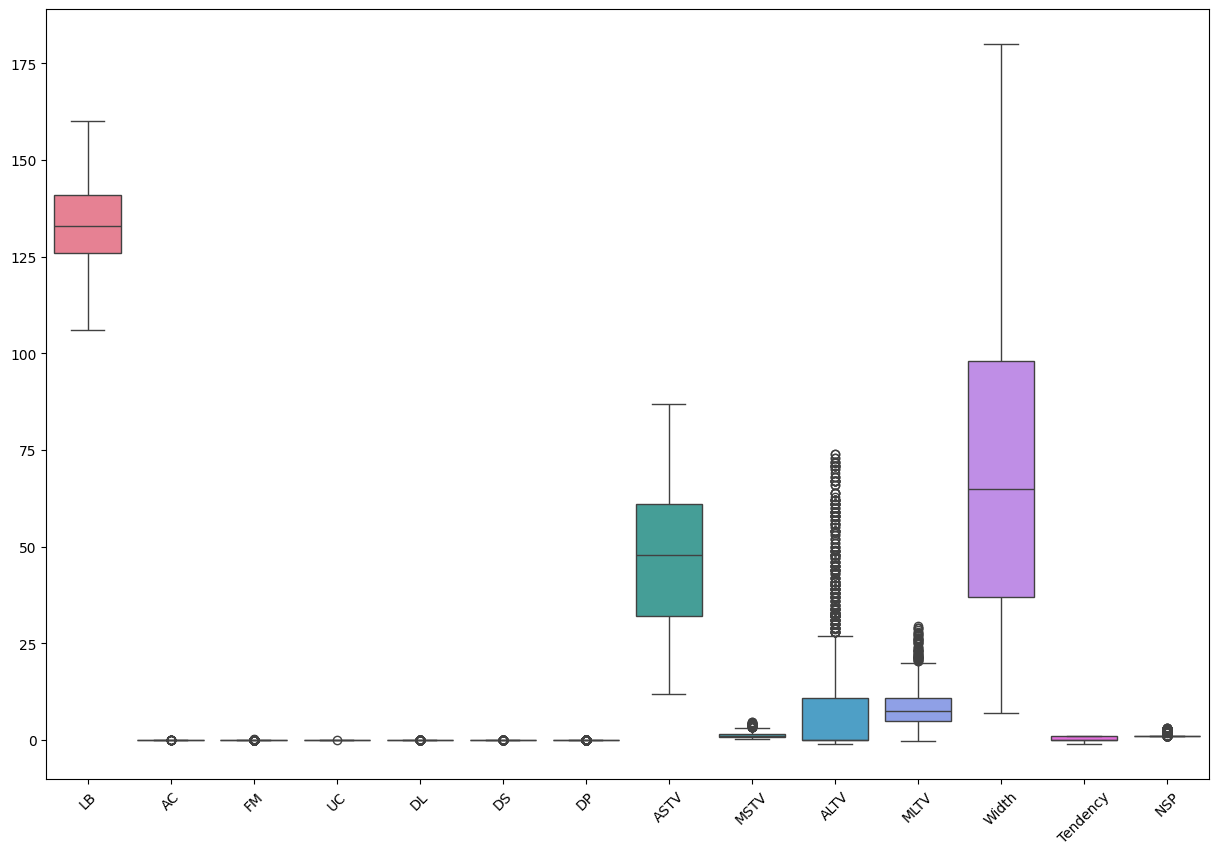

In [ ]:
plt.figure(figsize=(15, 10)) #Boxplot
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.show()

<Axes: >

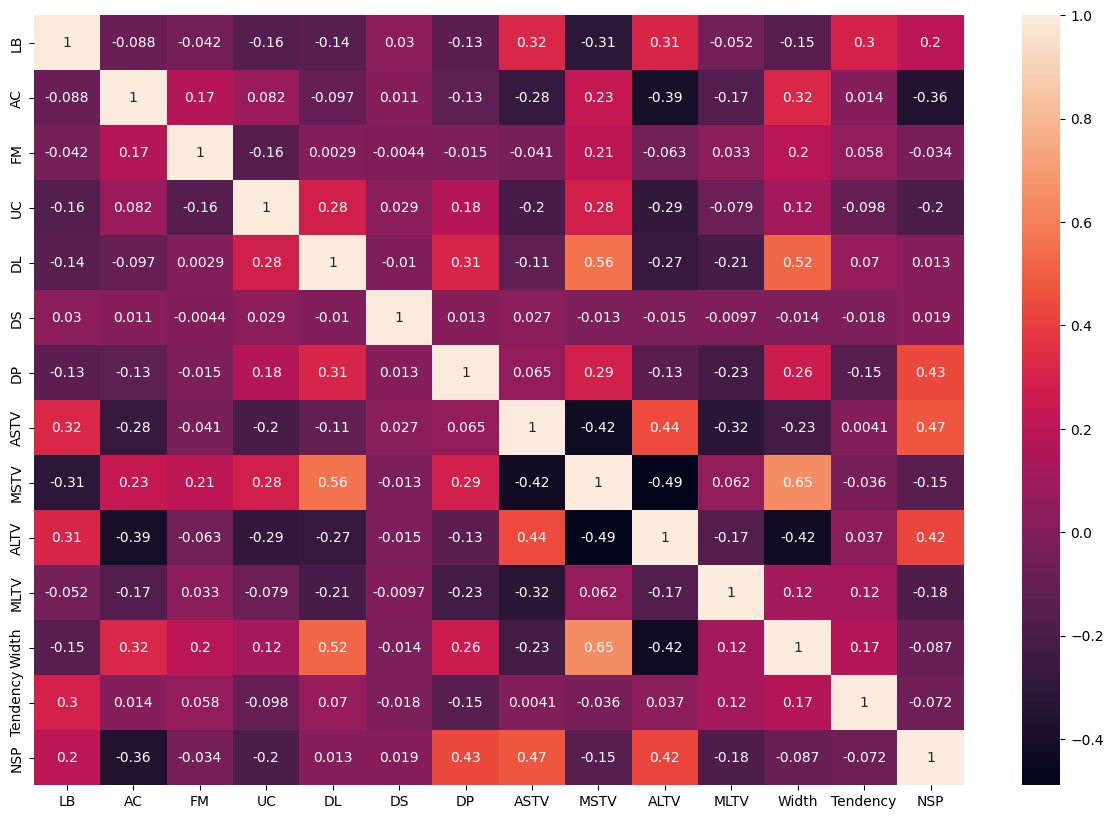

In [ ]:
fig=(plt.figure(figsize=(15,10)))
sns.heatmap(data.corr(),annot=True)


<Axes: >

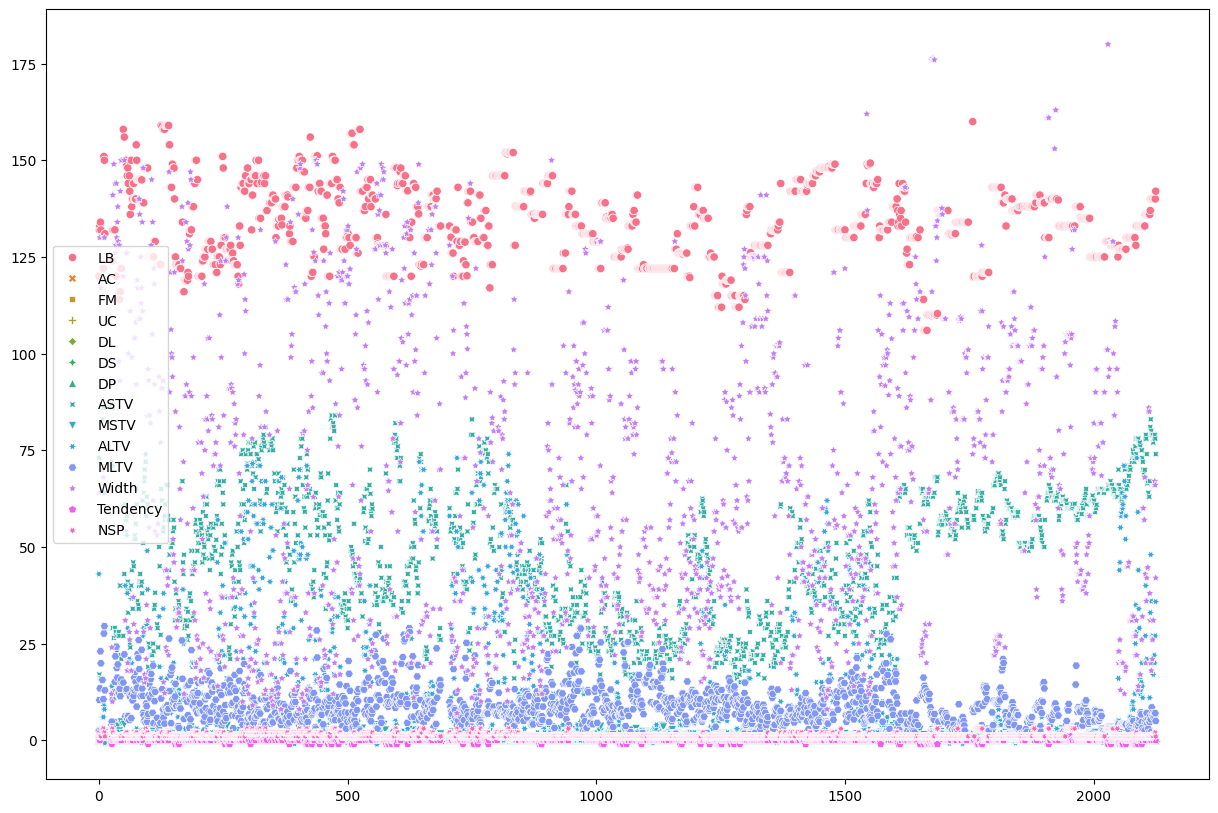

In [ ]:
fig=(plt.figure(figsize=(15,10)))
sns.scatterplot(data=data)

<Figure size 1500x1000 with 0 Axes>

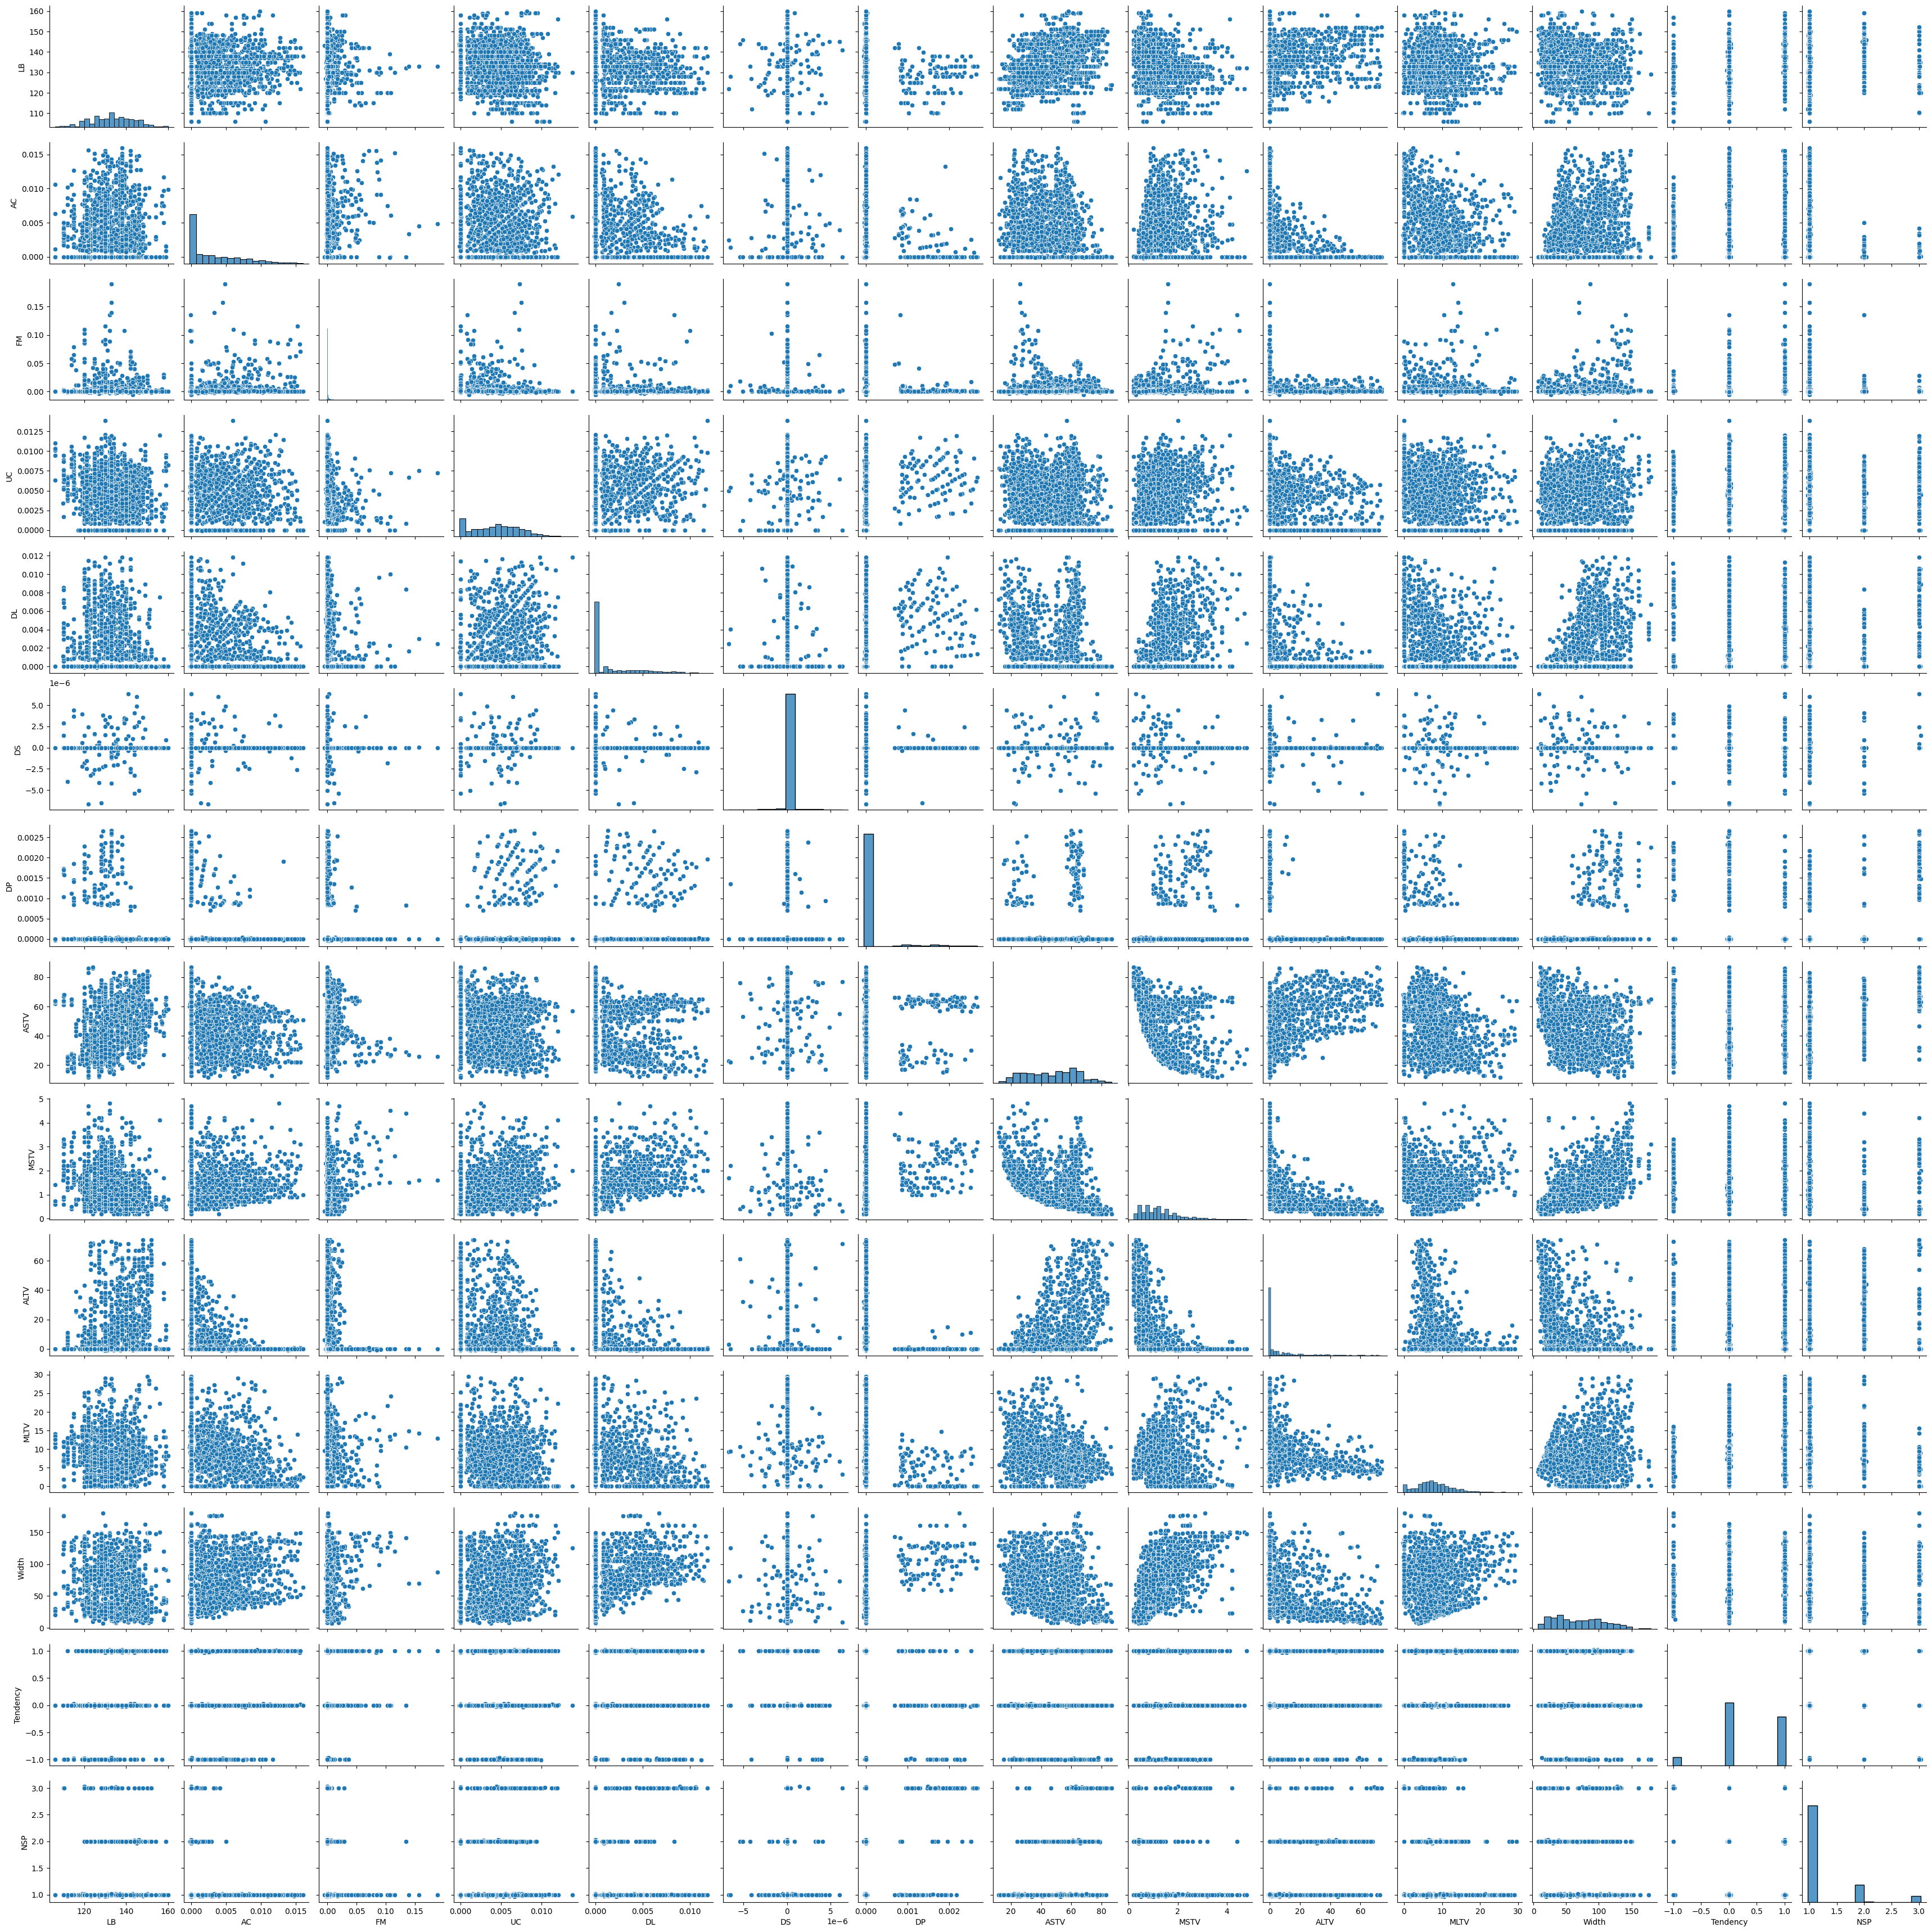

In [ ]:
fig=(plt.figure(figsize=(15,10)))
sns.pairplot(data)

<Axes: >

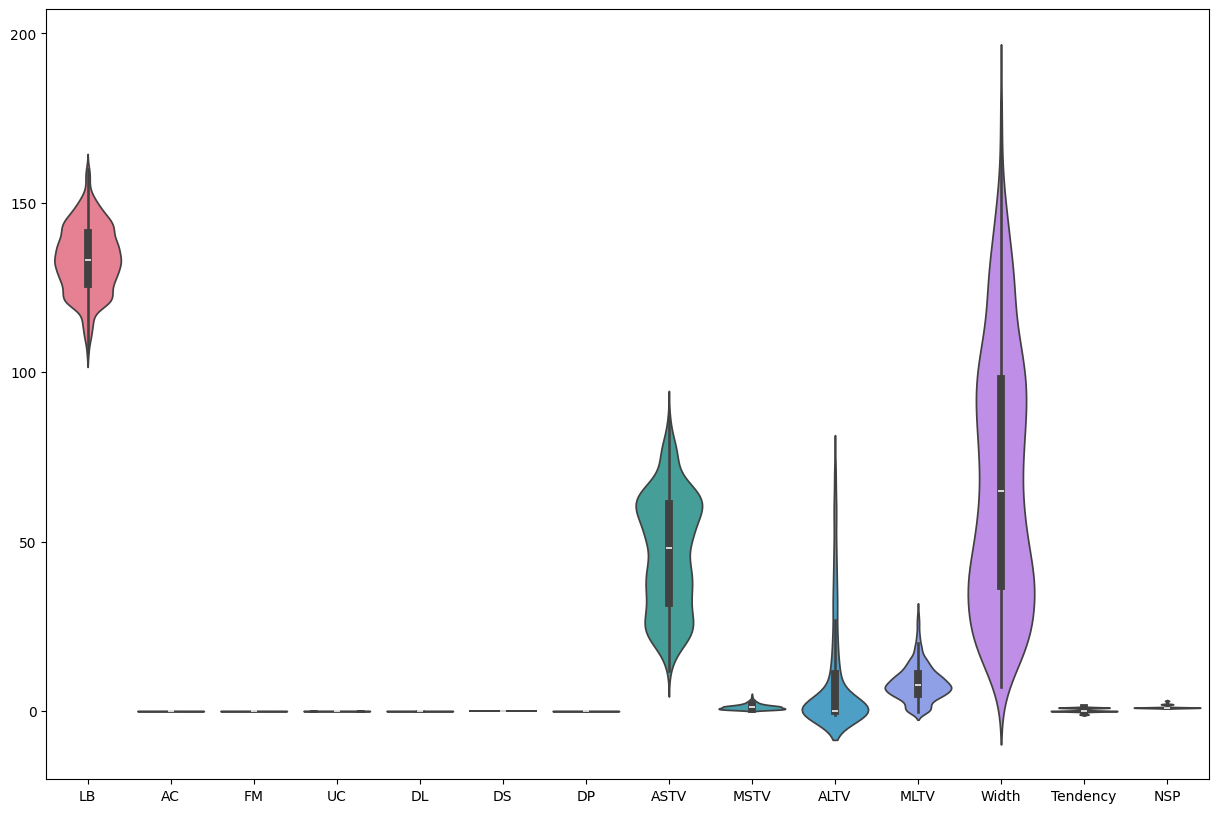

In [ ]:
fig=(plt.figure(figsize=(15,10)))
sns.violinplot(data=data)

##4.Pattern Recognation & Insights

In [ ]:
data.corr()

LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.087879 -0.042290 -0.162764 -0.144566  0.030050   
AC       -0.087879  1.000000  0.169951  0.081796 -0.097031  0.011348   
FM       -0.042290  0.169951  1.000000 -0.156579  0.002949 -0.004376   
UC       -0.162764  0.081796 -0.156579  1.000000  0.280573  0.028909   
DL       -0.144566 -0.097031  0.002949  0.280573  1.000000 -0.010151   
DS        0.030050  0.011348 -0.004376  0.028909 -0.010151  1.000000   
DP       -0.129866 -0.126298 -0.015114  0.177768  0.312432  0.013092   
ASTV      0.319767 -0.276639 -0.041320 -0.204720 -0.112411  0.026865   
MSTV     -0.313426  0.233240  0.206941  0.281404  0.563015 -0.013088   
ALTV      0.308419 -0.391042 -0.063088 -0.288396 -0.271951 -0.015280   
MLTV     -0.051618 -0.166951  0.033077 -0.079279 -0.213719 -0.009684   
Width    -0.147165  0.316212  0.196235  0.120047  0.520442 -0.014004   
Tendency  0.295659  0.013896  0.057821 -0.097774  0.069948 -0.017956   
NSP       0.200388 -0.356671 -0.033720 -0.195184  0.013244  0.018938   

                DP      ASTV      MSTV      ALTV      MLTV     Width  \
LB       -0.129866  0.319767 -0.313426  0.308419 -0.051618 -0.147165   
AC       -0.126298 -0.276639  0.233240 -0.391042 -0.166951  0.316212   
FM       -0.015114 -0.041320  0.206941 -0.063088  0.033077  0.196235   
UC        0.177768 -0.204720  0.281404 -0.288396 -0.079279  0.120047   
DL        0.312432 -0.112411  0.563015 -0.271951 -0.213719  0.520442   
DS        0.013092  0.026865 -0.013088 -0.015280 -0.009684 -0.014004   
DP        1.000000  0.065342  0.290163 -0.129516 -0.225163  0.257753   
ASTV      0.065342  1.000000 -0.424067  0.438588 -0.323510 -0.227068   
MSTV      0.290163 -0.424067  1.000000 -0.489474  0.062096  0.646005   
ALTV     -0.129516  0.438588 -0.489474  1.000000 -0.166028 -0.420330   
MLTV     -0.225163 -0.323510  0.062096 -0.166028  1.000000  0.116295   
Width     0.257753 -0.227068  0.646005 -0.420330  0.116295  1.000000   
Tendency -0.148824  0.004125 -0.035631  0.037108  0.115693  0.169414   
NSP       0.431235  0.474170 -0.150155  0.423546 -0.181595 -0.087021   

          Tendency       NSP  
LB        0.295659  0.200388  
AC        0.013896 -0.356671  
FM        0.057821 -0.033720  
UC       -0.097774 -0.195184  
DL        0.069948  0.013244  
DS       -0.017956  0.018938  
DP       -0.148824  0.431235  
ASTV      0.004125  0.474170  
MSTV     -0.035631 -0.150155  
ALTV      0.037108  0.423546  
MLTV      0.115693 -0.181595  
Width     0.169414 -0.087021  
Tendency  1.000000 -0.072061  
NSP      -0.072061  1.000000

from matplotlib import pyplot as plt
_df_0['LB'].plot(kind='hist', bins=20, title='LB')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['AC'].plot(kind='hist', bins=20, title='AC')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['FM'].plot(kind='hist', bins=20, title='FM')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['UC'].plot(kind='hist', bins=20, title='UC')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='LB', y='AC', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='AC', y='FM', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='FM', y='UC', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='UC', y='DL', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['LB'].plot(kind='line', figsize=(8, 4), title='LB')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['AC'].plot(kind='line', figsize=(8, 4), title='AC')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['FM'].plot(kind='line', figsize=(8, 4), title='FM')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['UC'].plot(kind='line', figsize=(8, 4), title='UC')
plt.gca().spines[['top', 'right']].set_visible(False)

Analyze variables that show strong correlations (above 0.6 or below -0.6).
E.g., DL vs UC, or ASTV vs ALTV.

<Axes: >

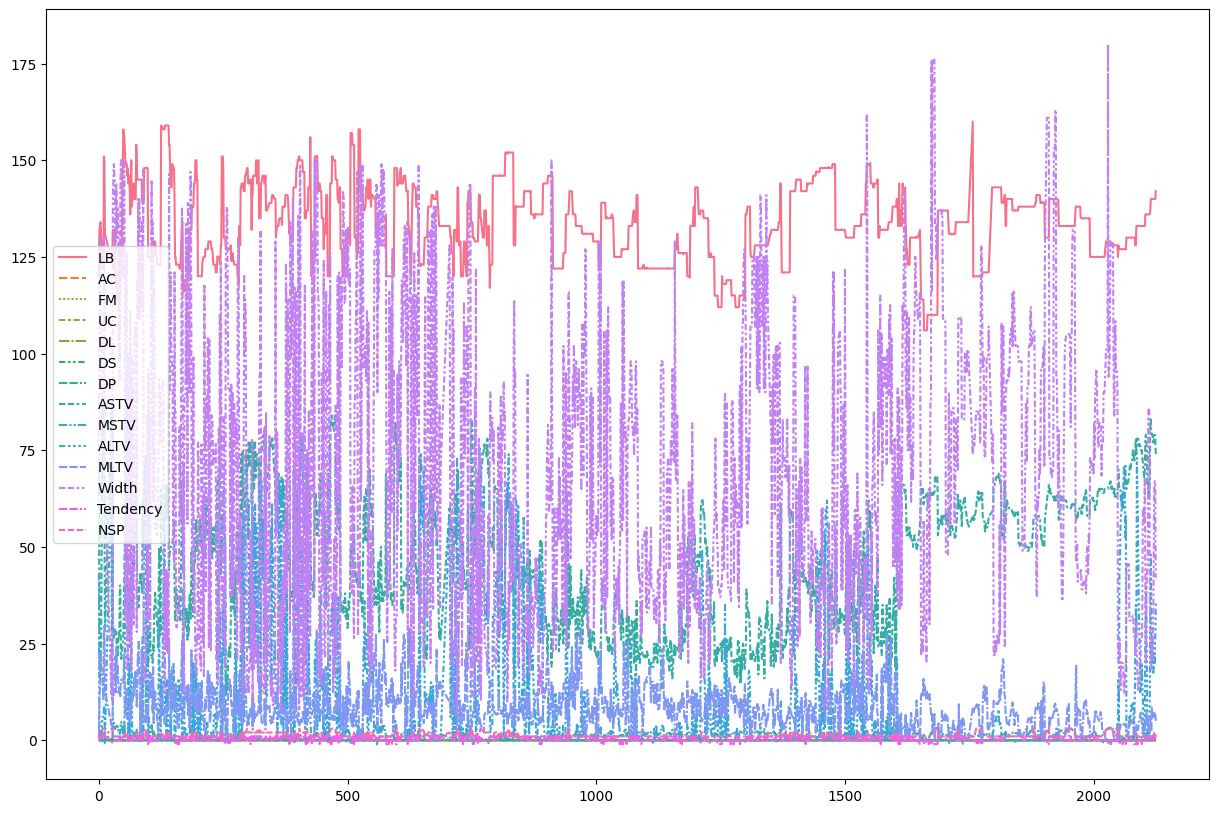

In [ ]:
fig=(plt.figure(figsize=(15,10)))
sns.lineplot(data=data)

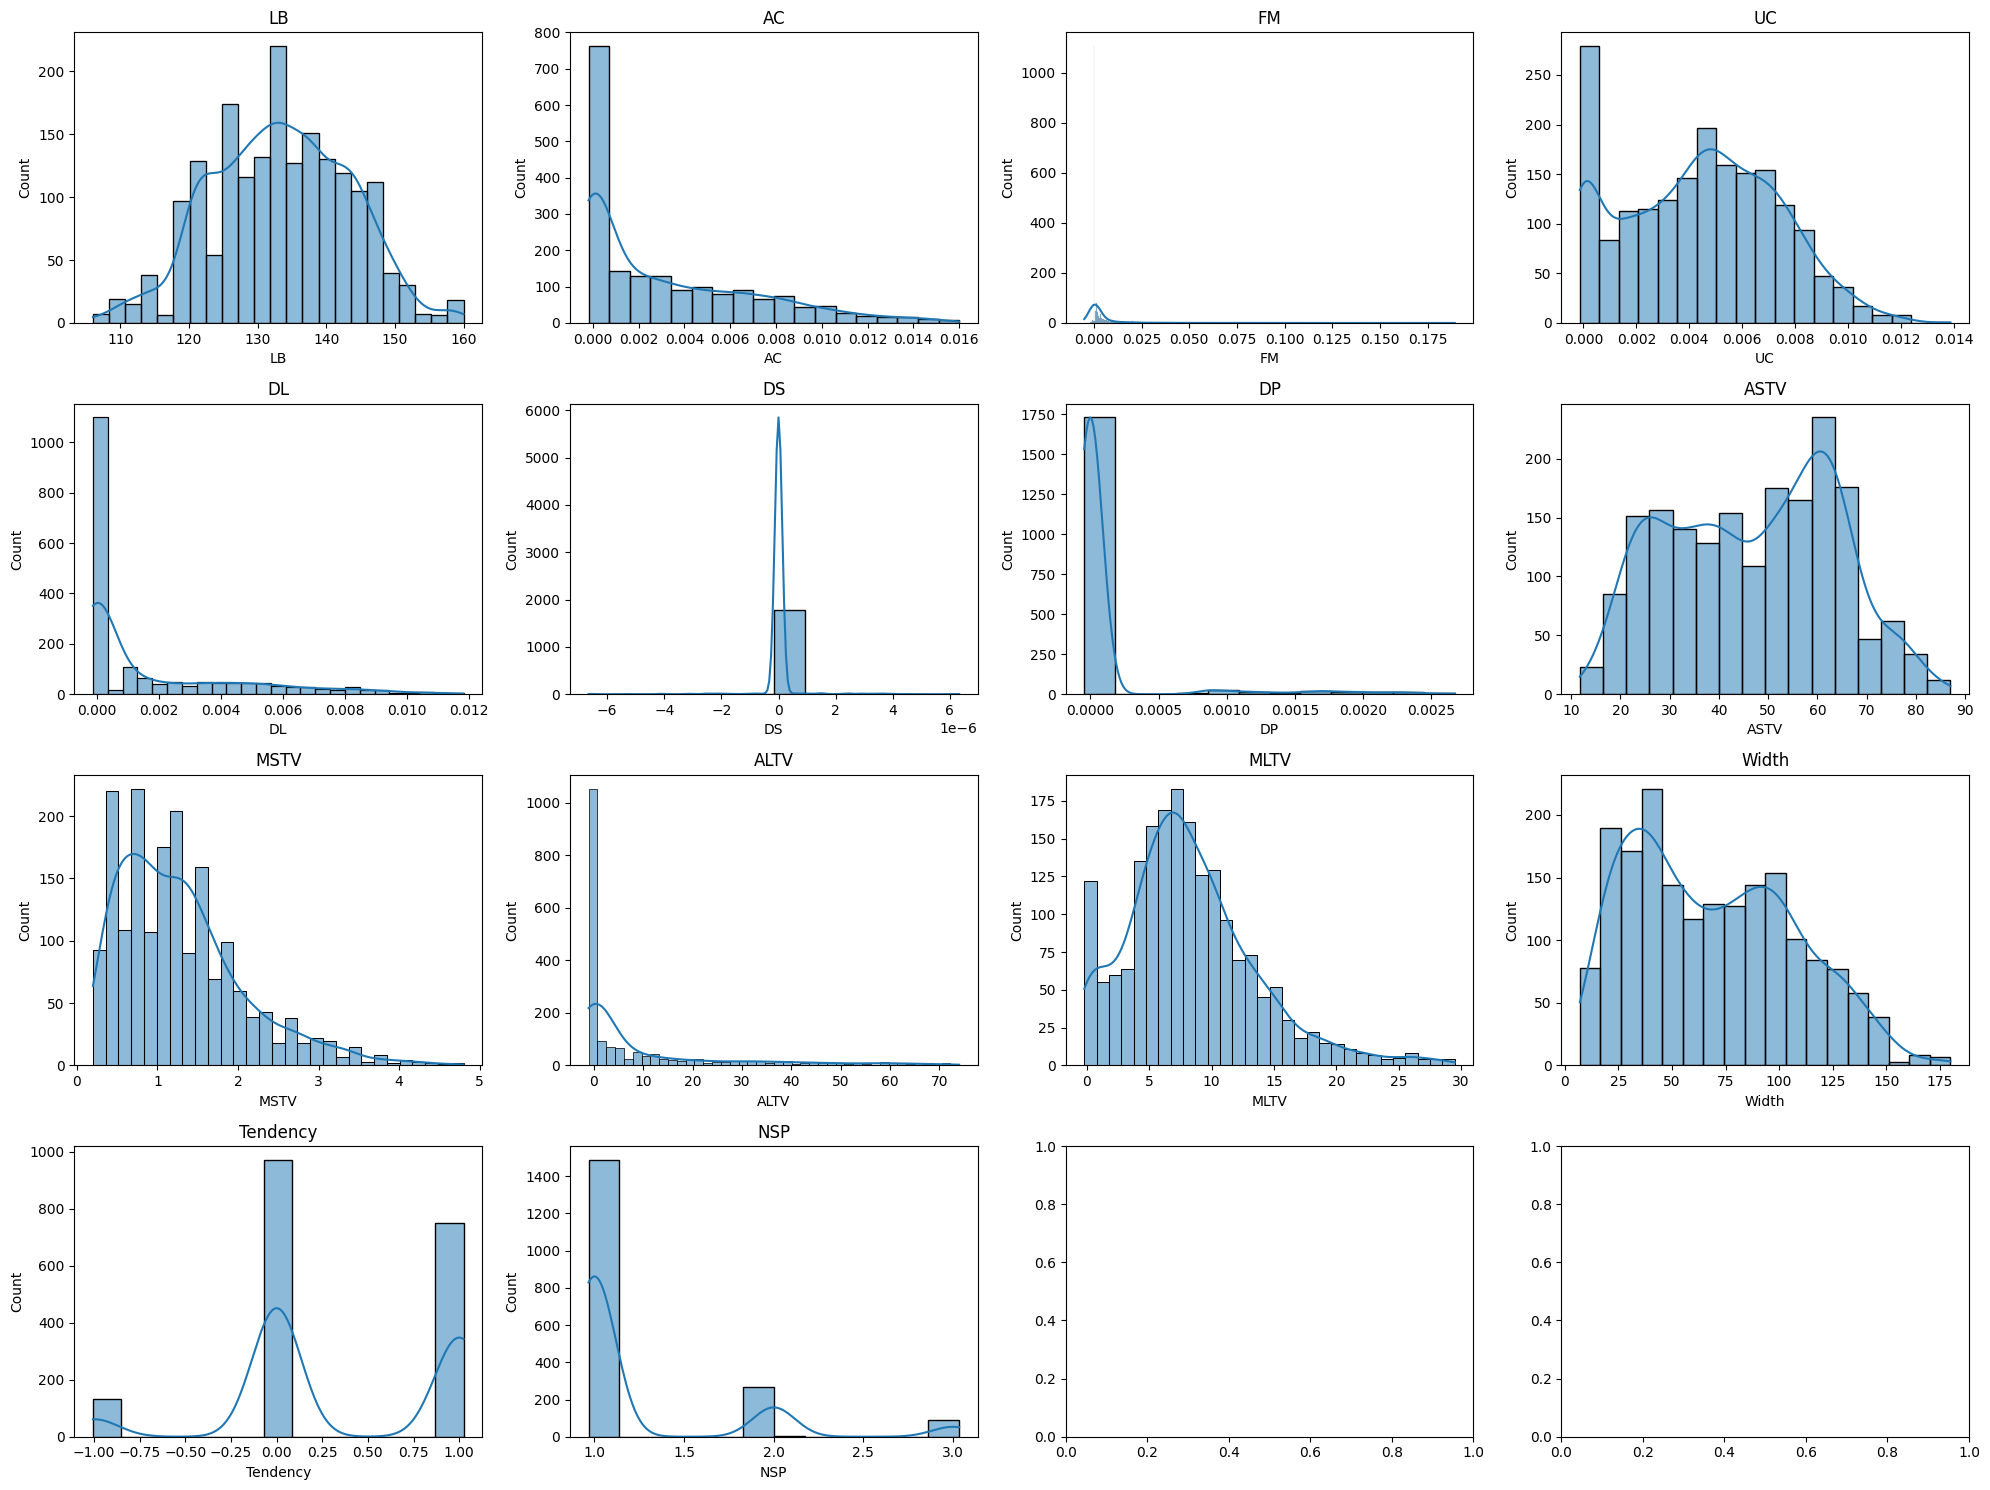

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
axes = axes.flatten()
for i, col in enumerate(data.columns):
    sns.histplot(data=data, x=col, ax=axes[i], kde=True)
    axes[i].set_title(col)
plt.tight_layout()


##5.Conclusion and Recommendations

After performing an Exploratory Data Analysis on the cardiographic.csv dataset, I observed:

1.LB (Baseline FHR) values mostly lie between normal physiological ranges.

2.Accelerations (AC) and Fetal Movements (FM) are indicators of fetal well-being and show moderate variability across records.

3.Uterine Contractions (UC) have a positive correlation with Late Decelerations (DL), which may suggest a stress response.

4.Some outliers were detected in variables like DP (Prolonged Decelerations) and ASTV, possibly indicating abnormal fetal conditions.

5.Heatmaps and pair plots reveal strong associations between short and long-term variability metrics (ASTV, MSTV, ALTV, MLTV).